<a href="https://colab.research.google.com/github/dkuzzmin/DI-Bootcamp/blob/main/Week7/Day2/W7D2_XC_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pprint
from urllib.request import urlopen


options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run Chrome in headless mode
options.add_argument("--no-sandbox")  # Bypass OS security model
options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems
driver = webdriver.Chrome(options=options)


In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

In [ ]:
url = 'https://www.bbc.com/weather/293397'
driver.get(url)

In [ ]:
wait = WebDriverWait(driver, 3)

wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'wr-day-temperature')))
wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'wr-day__title')))

<selenium.webdriver.remote.webelement.WebElement (session="ec3202017667affc7148fc43da410f92", element="715C6EA4139103A94974E0C70DEBE829_element_65")>

In [ ]:
temperature_elements = driver.find_elements(By.CLASS_NAME, 'wr-day-temperature')
date_elements = driver.find_elements(By.CLASS_NAME, 'wr-day__title')

In [ ]:
print(temperature_elements)

[<selenium.webdriver.remote.webelement.WebElement (session="ec3202017667affc7148fc43da410f92", element="715C6EA4139103A94974E0C70DEBE829_element_9")>, <selenium.webdriver.remote.webelement.WebElement (session="ec3202017667affc7148fc43da410f92", element="715C6EA4139103A94974E0C70DEBE829_element_67")>, <selenium.webdriver.remote.webelement.WebElement (session="ec3202017667affc7148fc43da410f92", element="715C6EA4139103A94974E0C70DEBE829_element_12")>, <selenium.webdriver.remote.webelement.WebElement (session="ec3202017667affc7148fc43da410f92", element="715C6EA4139103A94974E0C70DEBE829_element_68")>, <selenium.webdriver.remote.webelement.WebElement (session="ec3202017667affc7148fc43da410f92", element="715C6EA4139103A94974E0C70DEBE829_element_69")>, <selenium.webdriver.remote.webelement.WebElement (session="ec3202017667affc7148fc43da410f92", element="715C6EA4139103A94974E0C70DEBE829_element_16")>, <selenium.webdriver.remote.webelement.WebElement (session="ec3202017667affc7148fc43da410f92", 

In [ ]:
df = []
for date_element, temperature_element in zip(date_elements, temperature_elements):
  date = date_element.find_element(By.CLASS_NAME, 'wr-date').text
  temperature = temperature_element.find_element(By.CLASS_NAME, 'wr-value--temperature--c').text
  df.append({'date' : date, 'temp':temperature})

driver.quit()

In [ ]:
import pandas as pd
df = pd.DataFrame(df)
print(df)

        date temp
0      Today  19°
1   Thu 11th  18°
2   Fri 12th  17°
3   Sat 13th  19°
4   Sun 14th  18°
5   Mon 15th  17°
6   Tue 16th  19°
7   Wed 17th  19°
8   Thu 18th  20°
9   Fri 19th  20°
10  Sat 20th  20°
11  Sun 21st  21°
12  Mon 22nd  21°
13  Tue 23rd  21°


In [ ]:
df['temp'] = df['temp'].str.replace('°', '')
df['temp'] = df['temp'].astype(int)
df

,date,temp
0,Today,19
1,Thu 11th,18
2,Fri 12th,17
3,Sat 13th,19
4,Sun 14th,18
5,Mon 15th,17
6,Tue 16th,19
7,Wed 17th,19
8,Thu 18th,20
9,Fri 19th,20


In [ ]:
print('Median of weather: ', df['temp'].mean())
print('Coldest on the week: ', df['temp'].min())
print('Warmest on the week: ', df['temp'].max())

Median of weather:  19.214285714285715
Coldest on the week:  17
Warmest on the week:  21


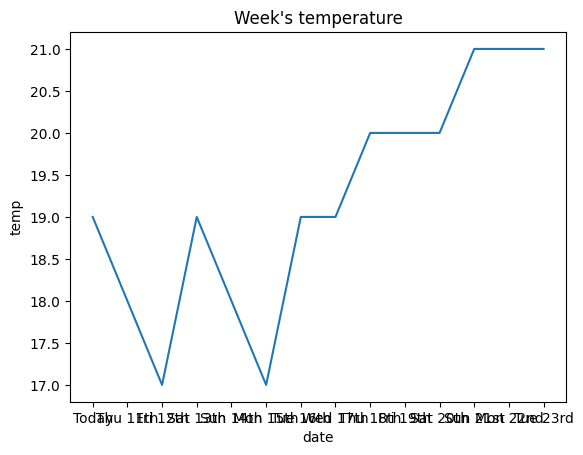

In [ ]:

sns.lineplot(x = df['date'], y = df['temp'])
plt.title("Week's temperature")
plt.show()

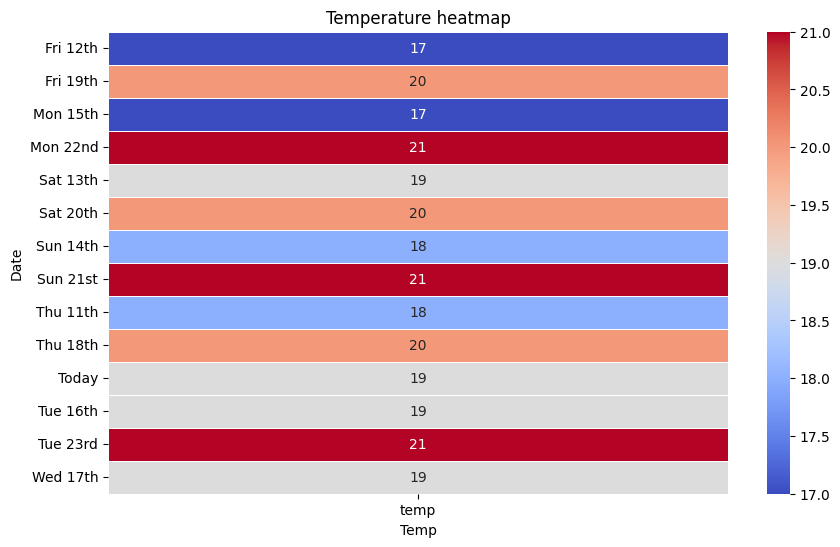

In [ ]:
pivot_data = df.pivot_table(index='date', values='temp', aggfunc='first')


plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='d')
plt.title('Temperature heatmap')
plt.xlabel('Temp')
plt.ylabel('Date')
plt.show()